In [1]:
"""🖇️Блок візуалізацій:

Можна будувати з використанням довільного бажаного фреймворку (зверніть увагу, візуалізації мають бути для потенційної презентації,
тому слід обрати гіпотези для візуалізацій, якщо потрібно змінити стилі, групування, 
тощо - тобто все що буде потенційно зрозуміло, наприклад менеджеру):

8. Діаграма розподілу гравців за віком по позиціях. (1 бал)

9. Діаграма розподілу гравців за рейтингом по позиціях. (1 бал)

10. Діаграма розподілу національностей за рейтингом гравців. (1 бал)
"""

'🖇️Блок візуалізацій:\n\nМожна будувати з використанням довільного бажаного фреймворку (зверніть увагу, візуалізації мають бути для потенційної презентації,\nтому слід обрати гіпотези для візуалізацій, якщо потрібно змінити стилі, групування, \nтощо - тобто все що буде потенційно зрозуміло, наприклад менеджеру):\n\n8. Діаграма розподілу гравців за віком по позиціях. (1 бал)\n\n9. Діаграма розподілу гравців за рейтингом по позиціях. (1 бал)\n\n10. Діаграма розподілу національностей за рейтингом гравців. (1 бал)\n'

In [3]:
# Read dataframe
import pandas as pd
import numpy as np

df = pd.read_csv('../files/fifa_players.csv', low_memory=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


def group_rare_categories(df_cat: pd.DataFrame, column: str, threshold: int = 5) -> pd.DataFrame:
    # Get quantity of players by cateogries
    counts = df_cat[column].value_counts()
    # Create list of rare cateogries
    rare_categories = counts[counts < threshold].index
    # Change rare categories to Other
    df_cat[column] = df_cat[column].replace(rare_categories, 'Other')

    category_order = df_cat[column].value_counts().index.tolist()
    if 'Other' in category_order:
        category_order.remove('Other')
        category_order.append('Other')  # Add Other to end
    # Change order of categories
    df_cat[column] = pd.Categorical(df_cat[column], categories=category_order, ordered=True)
    return df_cat


def explode_array_columns(df_exp: pd.DataFrame, column: str, only_first: bool = False) -> pd.DataFrame:
    if only_first:
        df_exp[column] = df_exp[column].apply(lambda x: x.split(',')[0])
    else:
        df_exp[column] = df_exp[column].str.split(',')
    return df_exp.explode(column)
    

def build_distribution_of_columns(x_column: str, y_column: str) -> None:
    df_filtered = df[[x_column, y_column]]

    # We have two variants to get player position with multiple values. I decide to get first position if player has multiple values.
    # But i create the function with parameter which can explode positions to different raws.
    if x_column == "player_positions":
        df_filtered = explode_array_columns(df_filtered, x_column, only_first=True)
    elif y_column == "player_positions":
        df_filtered = explode_array_columns(df_filtered, y_column, only_first=True)
    
    if x_column == "nationality_name":
        df_filtered = group_rare_categories(df_filtered, x_column, threshold = 300)
    elif y_column == "nationality_name":
        df_filtered = group_rare_categories(df_filtered, y_column, threshold = 300)
    
    plt.figure(figsize=(12, 8))
    plt.title(f'Distribution of {x_column} by {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid()

    # I tried different types of plots, but i choose boxplot because it's better for showing distribution in this case.
    sns.boxplot(x=x_column, y=y_column, data=df_filtered)
    plt.xticks(rotation=90)  # Rotate position labels if necessary
    plt.show()
    
    # Others variants of plots
    # sns.swarmplot(x=x_column, y=y_column, data=df_filtered)
    # sns.stripplot(x=x_column, y=y_column, data=df_filtered, jitter=True, size=5)
    # sns.violinplot(x=x_column, y=y_column, data=df_filtered)

C:\Users\o.savochkin\AppData\Local\Temp\ipykernel_4668\4259359963.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp[column] = df_exp[column].apply(lambda x: x.split(',')[0])


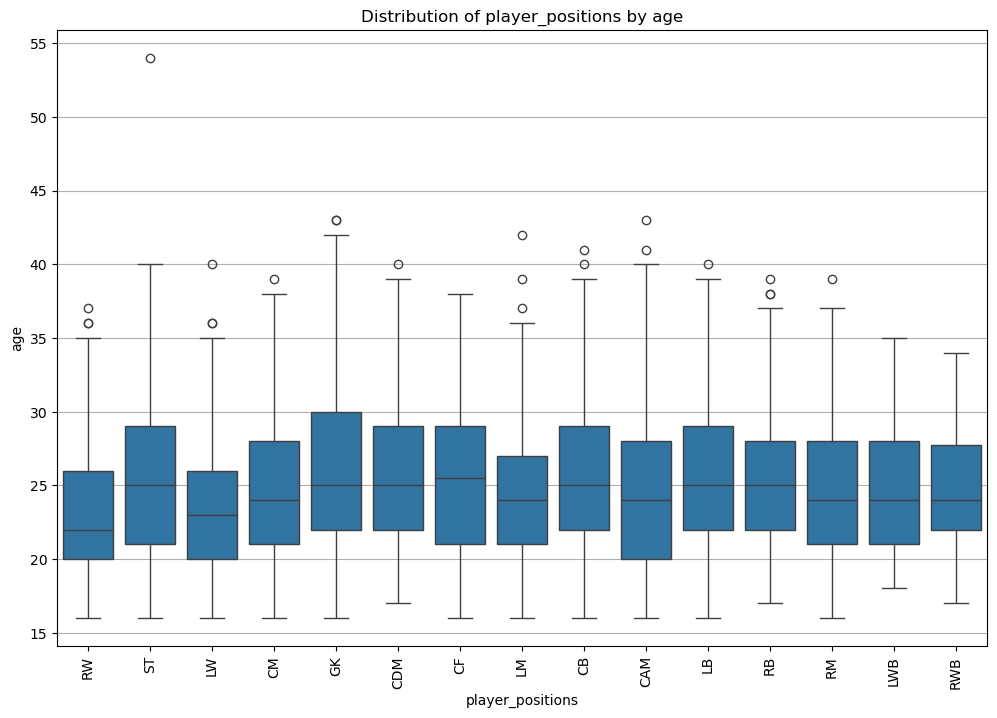

In [6]:
# 8. Діаграма розподілу гравців за віком по позиціях
build_distribution_of_columns('player_positions', 'age')

C:\Users\o.savochkin\AppData\Local\Temp\ipykernel_4668\4259359963.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp[column] = df_exp[column].apply(lambda x: x.split(',')[0])


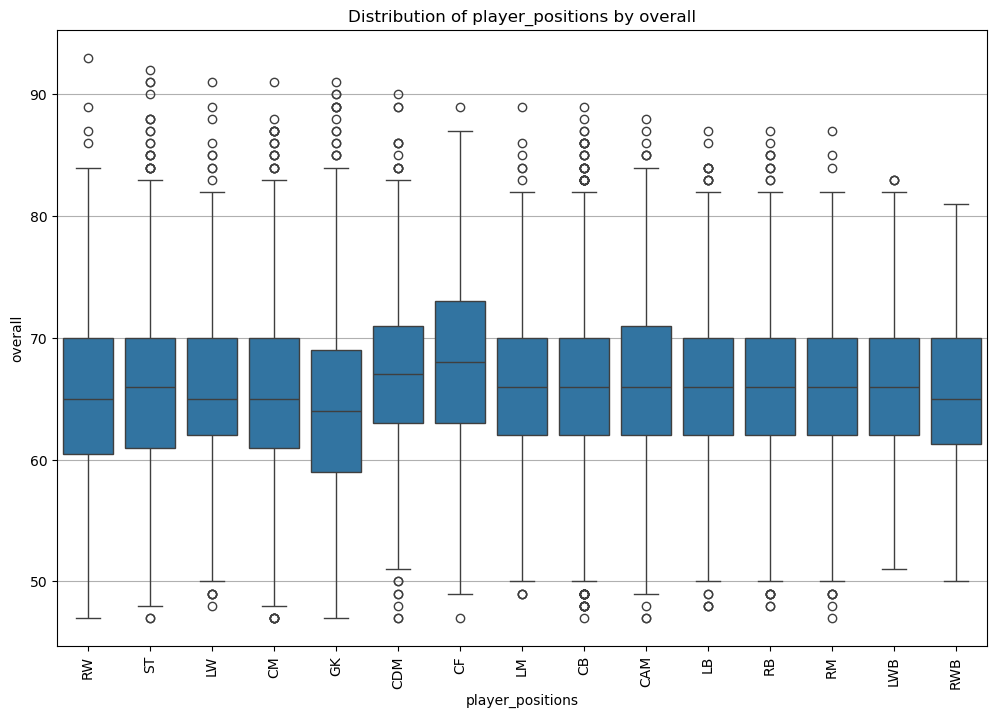

In [9]:
# 9. Діаграма розподілу гравців за рейтингом по позиціях.
build_distribution_of_columns('player_positions', 'overall')

C:\Users\o.savochkin\AppData\Local\Temp\ipykernel_4668\4259359963.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[column] = df_cat[column].replace(rare_categories, 'Other')
C:\Users\o.savochkin\AppData\Local\Temp\ipykernel_4668\4259359963.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[column] = pd.Categorical(df_cat[column], categories=category_order, ordered=True)


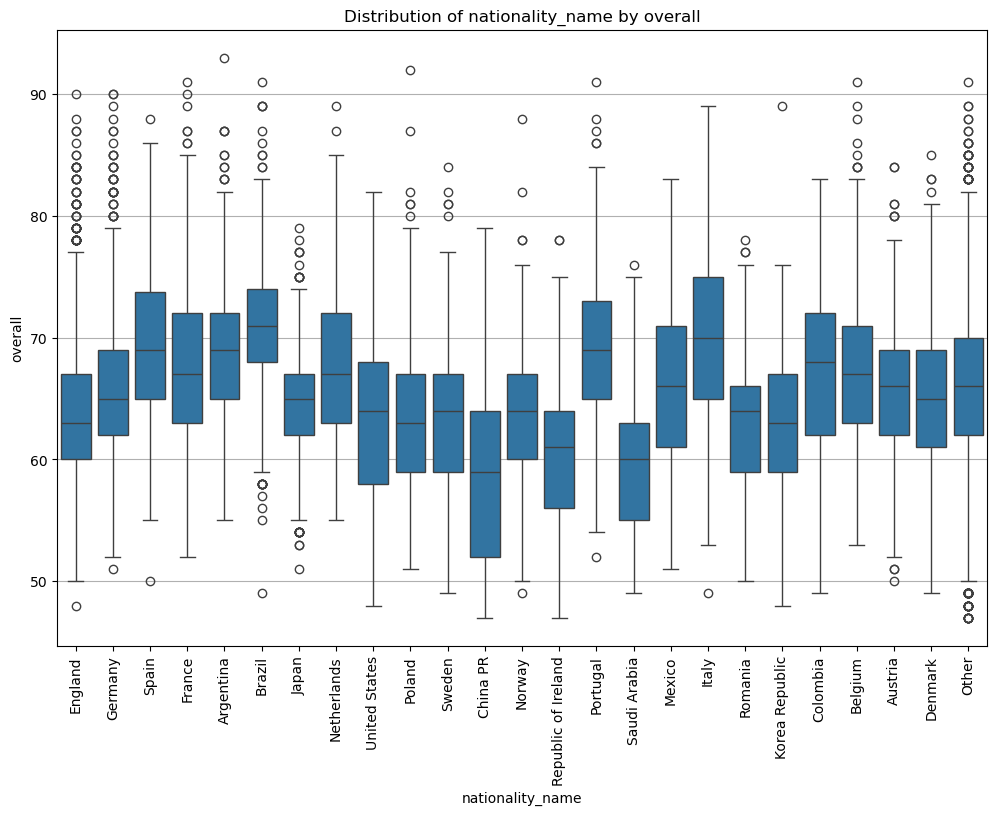

In [11]:
# 10. Діаграма розподілу національностей за рейтингом гравців.
build_distribution_of_columns('nationality_name', 'overall')